In [1]:
import torchvision
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
import PIL
from PIL import Image
import pickle

In [3]:
mnist_trainset = datasets.MNIST(root='../data', train=True, download=True, transform=None)

In [4]:
mnist_testset = datasets.MNIST(root='../data', train=False, download=True, transform=None)

In [5]:
def digits2data(dataset, inds):
    pics = []; digits = []
    for ii in range(4):
        pics.append(np.asarray(dataset[inds[ii] ][0]))
        digits.append(dataset[inds[ii] ][1])
    
    ab = np.hstack((pics[0],pics[1]))
    cd = np.hstack((pics[2],pics[3]))
    abcd = np.vstack((ab,cd))
    abcd = np.expand_dims(abcd, axis = 0)
    
    pointer = max(0,digits[0]-1)//3 + 1

    return abcd, digits[pointer], np.expand_dims(pics[pointer], axis = 0)

In [6]:
def iid_dataset(num_sample, dataset, AE = False):
    data_x = []; data_y = []; data_z = []
    for ii in range(num_sample):
        inds = np.random.randint(len(dataset), size = 4)
        x,y,z = digits2data(dataset, inds)
        data_x.append(x); data_y.append(y); data_z.append(z)
    if(AE):
        return data_x, data_z
    else:
        return data_x, data_y

In [7]:
import random
def sample_id(dataset, criterion):
    max_num = len(dataset)
    ids = [random.randint(0,max_num-1)]
    for ii in range(3):
        idx = random.randint(0,max_num-1)
        while(not(dataset[idx][1] in criterion[ii])):
            idx = random.randint(0,max_num-1)
        ids.append(idx)
    return ids

In [8]:
def shift_dataset(num_sample, dataset, is_train, AE = False):
    data_x = []; data_y = []; data_z = []
    if(is_train):
        c = [[4,5,6,7,8,9,0], [1,2,3,7,8,9,0], [1,2,3,4,5,6]  ]
    else:
        c = [[1,2,3], [4,5,6], [7,8,9,0] ]
    for ii in range(num_sample):
        inds = sample_id(dataset, c)
        x,y,z = digits2data(dataset, inds)
        data_x.append(x); data_y.append(y), data_z.append(z)
    if(AE):
        return data_x, data_z
    else:
        return data_x, data_y

## Generate for Visual PVR

In [12]:
train_x, train_y = shift_dataset(10000, mnist_trainset, is_train = True)
test_x, test_y = shift_dataset(1000, mnist_testset, is_train = False)

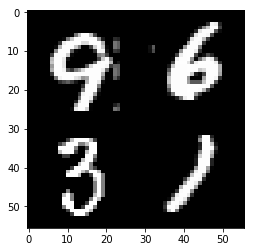

1


In [15]:
import random 
idx = random.randint(0,1000)
image = PIL.Image.fromarray(np.squeeze(train_x[idx]) )
plt.imshow(image)
plt.show()
print(train_y[idx])

In [16]:
## save for dataset
with open("noniid_train.txt", "wb") as fp:   
    pickle.dump((train_x, train_y), fp)
with open("noniid_test.txt", "wb") as fp:  
    pickle.dump((test_x, test_y), fp)

## Generate for Visual PVR Auto-encoder

In [17]:
train_x, train_z = shift_dataset(10000, mnist_trainset, is_train = True, AE = True)
test_x, test_z = shift_dataset(1000, mnist_testset, is_train = False, AE = True)

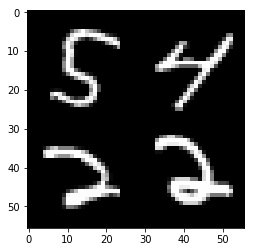

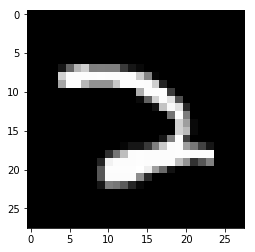

In [18]:
import random 
idx = random.randint(0,1000)
image = PIL.Image.fromarray(np.squeeze(train_x[idx]) )
plt.imshow(image)
plt.show()
image = PIL.Image.fromarray(np.squeeze(train_z[idx]) )
plt.imshow(image)
plt.show()

In [19]:
#save for auto-encoder datasets
with open("noniid_ae_train.txt", "wb") as fp:   
    pickle.dump((train_x, train_z), fp)
with open("noniid_ae_test.txt", "wb") as fp: 
    pickle.dump((test_x, test_z), fp)